In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
base_dir = '..\\..\\Bases\\'
os.chdir(base_dir)
os.getcwd()

'G:\\Users\\johns\\Desktop\\TCC\\MPAlugueisLisboa\\Bases'

In [3]:
path_final =  'Imoveis\\BaseFinalv2.csv'
df_final = pd.read_csv(path_final, sep=';', decimal=',', encoding='utf-8',quotechar='"')
df_final.head(1)

,RowId,RowId.1,Id_do_imovel,Preco,Valor_Area_util_do_imovel,Numero_Andar_do_imovel,Indicador_de_Elevador,Distrito_do_imovel,Preco_por_metro_quadrado,Latitude_imovel,...,Quantidade_Bancos,Latitude_Municipio,Longitude_Municipio,Endereco_Municipio,Distancia_dirigindo_de_Lisboa_Portugal,Distancia_dirigindo_de_Porto_Portugal,Clima_Ranking,Ranking_Geral,Ranking_Regional,geometry
0,0,0,30365582,400.0,50,0,sem elevador,AVEIRO,8.0,40.837436,...,39,40.640496,-8.653784,"Aveiro, Portugal",218.6,56.6,18,31.0,4,POINT (40.8374358 -8.6551784)


In [8]:
# selecionando o target
target = 'Preco'

# construindo uma lista com os nomes apenas das variáveis categóricas
cat_vars = df_final.select_dtypes(include='object').columns.to_list()
cat_vars.remove('Endereco_Municipio')
cat_vars.remove('geometry')
cat_vars

['Indicador_de_Elevador',
 'Distrito_do_imovel',
 'Tipo_de_Certificacao_Energetica',
 'Nome_Regiao',
 'Nome_Cidade']

In [25]:
# lista apenas com os nomes das variáveis numéricas
num_vars = [col for col in df_final.columns if col not in cat_vars + ['Id_do_imovel', target]]
num_vars.remove('RowId.1')
num_vars.remove('RowId')
num_vars.remove('geometry')
num_vars.remove('Endereco_Municipio')
num_vars

['Valor_Area_util_do_imovel',
 'Numero_Andar_do_imovel',
 'Preco_por_metro_quadrado',
 'Latitude_imovel',
 'Longitude_imovel',
 'Tipo_de_Construcao',
 'Numero_de_Banheiros',
 'Possui_Jardim',
 'Possui_Elevador',
 'Possui_Estacionamento',
 'Possui_Piscina',
 'Possui_Terraco',
 'Numero_de_Quartos',
 'Indicador_Anuncio_possui_planta_baixa',
 'Numero_de_fotos_do_anuncio',
 'Numero_de_videos_do_anuncio',
 'Tipo_de_Operacao',
 'Tipo_de_proprietario',
 'Numero_Faixa_Etaria_0-14',
 'Numero_Faixa_Etaria_15-64',
 'Numero_Faixa_Etaria_>65',
 'Percentual_Faixa_Etaria_0-14',
 'Percentual_Faixa_Etaria_15-64',
 'Percentual_Faixa_Etaria_>65',
 'Densidade_populacional_por_Km',
 'Densidade_populacional_Estrangeiros',
 'Quantidade_Hospitais_(Particulares_e_Publicos)',
 'Quantidade_Farmacias',
 'Quantidade_Construcoes_Novas',
 'Quantidade_Escolas_Pre-Escolar_(4-6_anos)',
 'Quantidade_Escolas_Ciclo_1_(6-10_anos)',
 'Quantidade_Escolas_Ciclo_2_(10-12_anos)',
 'Quantidade_Escolas_Ciclo_3_(13-15_anos)',
 'Qua

In [34]:
y_test

3590    1950.0
4972     900.0
1790    1000.0
5891     850.0
4956     750.0
         ...  
3536    1150.0
2541    1100.0
2171    1450.0
3550     890.0
1907     750.0
Name: Preco, Length: 1269, dtype: float64

In [26]:
# separando a base em treino e teste
X = df_final.filter(cat_vars + num_vars).copy()
y = df_final['Preco'].copy()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=30)

In [27]:
# instalando o pacote feature-engine
!pip install feature-engine


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
from feature_engine.imputation import ArbitraryNumberImputer
from feature_engine.imputation import CategoricalImputer
from feature_engine.encoding import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

model = Pipeline(steps=[
    ('numeric_imputer', ArbitraryNumberImputer(arbitrary_number=-999, variables=num_vars)),
    ('categoric_imputer', CategoricalImputer(fill_value='Missing', variables=cat_vars)),
    ('one_hot_encoder', OneHotEncoder(variables=cat_vars)),
    ('random_forest', RandomForestRegressor(n_estimators=500, max_depth=5, random_state=30)) # Para testar: Utilize diferente algoritmos.
])

In [29]:
model.fit(X_train, y_train)
y_previsto = model.predict(X_test)
y_esperado = y_test.copy()

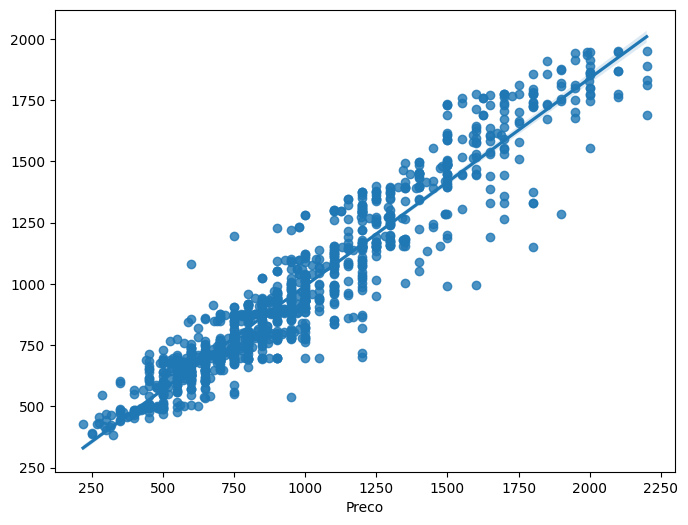

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(8, 6))

sns.regplot(x=y_esperado, y=y_previsto, ax=ax);

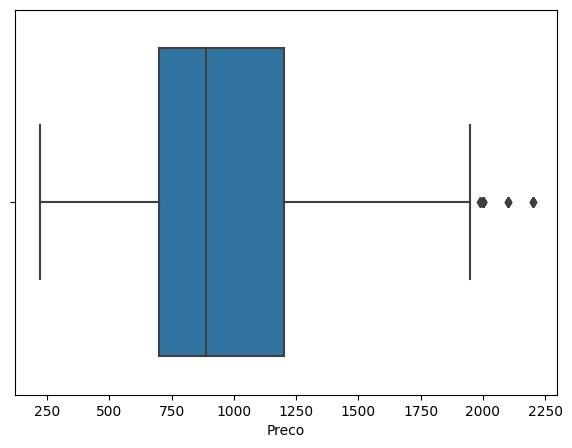

In [48]:
fig, ax = plt.subplots(figsize=(7,5))

sns.boxplot(x=y_esperado);

In [53]:
y_esperado_sem_outlier = y_esperado[y_esperado < 1500]
y_previsto_sem_outlier = y_previsto[y_esperado < 1500]



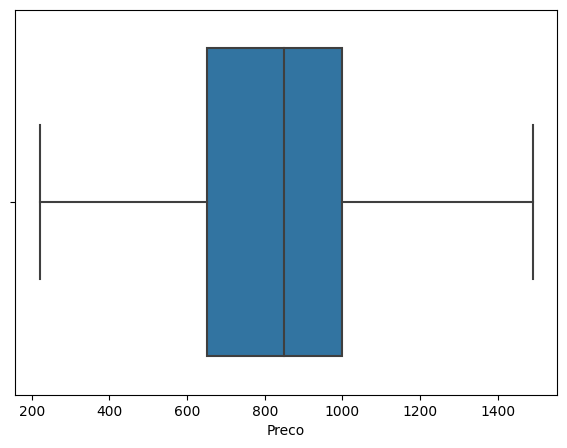

In [54]:
fig, ax = plt.subplots(figsize=(7,5))
sns.boxplot(x=y_esperado_sem_outlier);



### R2 e R2 Ajustado

In [56]:
from sklearn.metrics import r2_score

r2 = r2_score(y_esperado, y_previsto)
r2_sem_outliers = r2_score(y_esperado_sem_outlier, y_previsto_sem_outlier)

print('R2 COM outliers:', r2)
print('R2 SEM outliers:', r2_sem_outliers)

R2 COM outliers: 0.9015287148230697
R2 SEM outliers: 0.8348783916073366


In [57]:
def adjusted_r2(y_esperado, y_previsto, X_treino):
  r2 = r2_score(y_esperado, y_previsto)
  N = len(y_esperado)
  p = X_treino.shape[1]

  r2_ajustado = (1 - ((1 - r2) * (N - 1)) / (N - p - 1))
  return r2_ajustado

In [58]:
r2_ajustado = adjusted_r2(y_esperado, y_previsto, X_train)
r2_ajustado_sem_outliers = r2_score(y_esperado_sem_outlier, y_previsto_sem_outlier)

print('R2 Ajustado COM outliers:', r2_ajustado)
print('R2 Ajustado SEM outliers:', r2_ajustado_sem_outliers)

R2 Ajustado COM outliers: 0.897317771706951
R2 Ajustado SEM outliers: 0.8348783916073366


### MSE
calcular a diferença entre o valor previsto mo valor esperado.

In [64]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_esperado, y_previsto)
mse_sem_outliers = mean_squared_error(y_esperado_sem_outlier, y_previsto_sem_outlier)

print('MSE COM outliers:', mse)
print('MSE SEM outliers:', mse_sem_outliers)

MSE COM outliers: 14757.788513247737
MSE SEM outliers: 11315.176306408568


### RMSE

*Root Mean Squared Error*

*Raiz Quadrada do Erro médio*

- Mesma unidade da medida original (por isso tiramos a raiz quadrada)
- Erros maiores são mais penalizados (muito afetado por outliers)

In [65]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mse)
rmse_sem_outliers = np.sqrt(mse_sem_outliers)

print('RMSE COM outliers:', rmse)
print('RMSE SEM outliers:', rmse_sem_outliers)

RMSE COM outliers: 121.48163858479904
RMSE SEM outliers: 106.37281751654682


RMSE COM outliers: 121.48163858479904
RMSE SEM outliers: 106.37281751654682


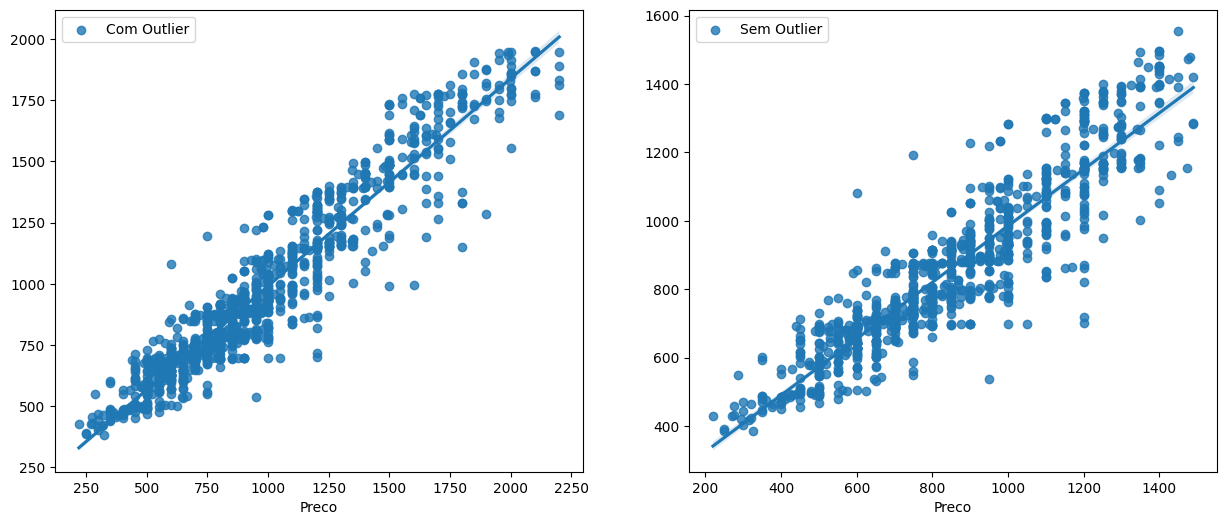

In [67]:
#Tirando os outliers, o `rmse` melhora bastante. Muitas vezes pode acontecer de quebrarmos o problema de regressão em 2: 
#criar um modelo para os pontos normais e outro modelo para outliers.
#no nosso caso não houve essa melhora

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

sns.regplot(x=y_esperado, y=y_previsto, label='Com Outlier', ax=ax[0]);
sns.regplot(x=y_esperado_sem_outlier, y=y_previsto_sem_outlier, label='Sem Outlier', ax=ax[1]);
ax[0].legend();
ax[1].legend();

print('RMSE COM outliers:', rmse)
print('RMSE SEM outliers:', rmse_sem_outliers)

## RMSLE
Root Mean Squared Logarithmic Error

Raiz Quadrado do Erro Logarítmico Médio

Aproximação do erro percentual
RMSE se importa mais com a diferença simples, enquanto o RMSLE se importa com a diferença relativa (logs).
É mais robusta a outliers

In [68]:
from sklearn.metrics import mean_squared_log_error

In [69]:
rmsle = np.sqrt(mean_squared_log_error(y_esperado, y_previsto))
rmsle_sem_outlier = np.sqrt(mean_squared_log_error(y_esperado_sem_outlier, y_previsto_sem_outlier))

print('RMSLE COM outliers:', rmsle)
print('RMSLE SEM outliers:', rmsle_sem_outlier)

RMSLE COM outliers: 0.13795203342011242
RMSLE SEM outliers: 0.13978460853967656


## MAE
Mean Absolute Error

Erro Médio Absoluto

Sofre menos efeitos de outliers
Usa o valor absoluto em contraste com o mse, por isso sofre menos os efeitos dos outliers

In [70]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_esperado, y_previsto)
mae_sem_outliers = mean_absolute_error(y_esperado_sem_outlier, y_previsto_sem_outlier)
print('MAE COM outliers:', mae)
print('MAE SEM outliers:', mae_sem_outliers)

MAE COM outliers: 88.52664488623648
MAE SEM outliers: 80.67644065187174


### MAPE

*Mean Absolute Percent Error*

*Erro Médio Absoluto Percentual*

In [71]:
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/y_true))

In [72]:
from sklearn.metrics import median_absolute_error

mape = calculate_mape(y_esperado, y_previsto)
mape_sem_outlier = calculate_mape(y_esperado_sem_outlier, y_previsto_sem_outlier)

print('MAPE Sem Outlier:', mape)
print('MAPE Com Outlier:', mape_sem_outlier)

MAPE Sem Outlier: 0.10347110041474394
MAPE Com Outlier: 0.10668756177521303


Erramos em média 10%